# 3. Skills Trend

### Importar módulos y librerías

In [ ]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [26]:
import calendar

### Cargar datos

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

### Limpieza de datos

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Agrupar habilidades (skills) por mes

In [13]:
# Seleccionamos aquellos puestos que sean de Data Analyst y que se encuentren en Argentina, 
# y los guardamos en un nuevo DataFrame df_DA_ARG
df_DA_ARG = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Argentina')].copy()

# Creamos una nueva columna en el DataFrame que contendrá el mes en que se publicó cada trabajo
# dt permite extraer componentes de fecha (como el mes en este caso)
df_DA_ARG['job_posted_month_number'] = df_DA_ARG['job_posted_date'].dt.month

# Creamos otro DataFrame que contendrá las skills
df_DA_ARG_skills = df_DA_ARG.explode('job_skills')

### Creación de Tabla dinámica (Pivot table) para luego visualizar datos

In [17]:
df_DA_ARG_pivot = df_DA_ARG_skills.pivot_table(index='job_posted_month_number', columns='job_skills', aggfunc='size', fill_value=0)
# Se utiliza size en vez de count porque:
# - size cuenta todas las filas, sin importar si hay valores NaN (faltantes)
# - count cuenta solo los valores NO nulos en cada columna

df_DA_ARG_pivot

job_skills,airflow,alteryx,assembly,aws,azure,bash,bigquery,c++,clickup,css,...,sql,sql server,ssis,tableau,trello,unix,vba,visio,visual basic,word
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,0,0,...,12,0,1,6,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,7,0,0,6,0,0,0,0,0,0
3,2,0,1,1,0,0,0,0,0,0,...,7,0,1,2,0,0,0,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,7,0,0,3,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,8,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,9,0,0,2,0,0,1,0,0,0
7,0,0,0,1,2,0,0,0,0,0,...,15,0,0,12,0,0,0,0,0,1
8,3,3,0,1,3,1,2,0,1,2,...,40,1,0,26,1,1,0,1,1,2
9,0,2,1,5,3,1,0,0,0,0,...,21,0,0,8,0,0,1,2,0,0


### Ordenar columnas por cantidad

In [19]:
df_DA_ARG_pivot.loc['Total'] = df_DA_ARG_pivot.sum()
# loc permite crear una nueva fila

df_DA_ARG_pivot = df_DA_ARG_pivot[df_DA_ARG_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_ARG_pivot = df_DA_ARG_pivot.drop('Total')

df_DA_ARG_pivot


job_skills,sql,excel,python,tableau,power bi,r,looker,aws,sas,microstrategy,...,ggplot2,php,sharepoint,scala,redis,shell,spreadsheet,trello,unix,visual basic
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,12,4,6,6,2,2,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,7,5,1,6,2,1,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,7,4,4,2,3,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,3,5,3,3,3,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,3,4,0,1,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
6,9,6,5,2,4,4,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
7,15,12,7,12,9,4,1,1,2,0,...,0,0,0,0,0,0,1,0,0,0
8,40,26,24,26,22,13,5,1,4,5,...,1,1,0,0,1,0,0,1,1,1
9,21,20,12,8,13,9,0,5,2,3,...,0,0,1,0,0,0,0,0,0,0


### Graficar la tabla dinámica

Line chart de las top 5 habilidades para Data Analysts, indexado por mes.lls for data analysts, indexed by month.

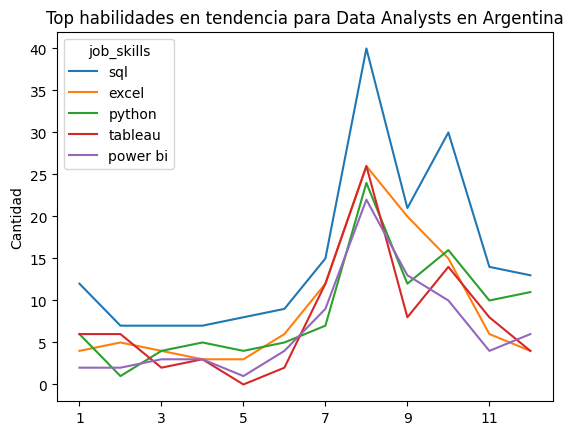

In [ ]:
df_DA_ARG_pivot.iloc[:, :5].plot(kind='line')
# [:, :5] selecciona todas las filas, y las primeras 5 columnas

plt.title('Top habilidades en tendencia para Data Analysts en Argentina')
plt.ylabel('Cantidad')
plt.xlabel('')
plt.show()

### Para mayor claridad del gráfico, se calcularán los porcentajes del total de puestos de trabajo publicados por mes

In [29]:
DA_totals = df_DA_ARG.groupby('job_posted_month_number').size()

DA_totals

job_posted_month_number
1     22
2     13
3     10
4      9
5     10
6     14
7     25
8     57
9     37
10    44
11    23
12    22
dtype: int64

In [30]:
# Dividir las primeras 12 filas de df_DA_ARG_pivot por DA_totals
df_DA_ARG_percent = df_DA_ARG_pivot.iloc[:12].div(DA_totals/100, axis=0)

### Reemplazar los números de los meses por nombres

In [31]:
meses_es = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

A diferencia del tutorial, reemplazamos por los nombres en castellano

In [32]:
df_DA_ARG_percent = df_DA_ARG_percent.reset_index()
#df_DA_ARG_percent['job_posted_month'] = df_DA_ARG_percent['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_ARG_percent['job_posted_month'] = df_DA_ARG_percent['job_posted_month_number'].apply(lambda x: meses_es[int(x)-1])
df_DA_ARG_percent = df_DA_ARG_percent.set_index('job_posted_month')
df_DA_ARG_percent = df_DA_ARG_percent.drop(columns='job_posted_month_number')

df_DA_ARG_percent

job_skills,sql,excel,python,tableau,power bi,r,looker,aws,sas,microstrategy,...,ggplot2,php,sharepoint,scala,redis,shell,spreadsheet,trello,unix,visual basic
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Enero,54.545455,18.181818,27.272727,27.272727,9.090909,9.090909,9.090909,4.545455,0.000000,4.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.545455,0.0,0.000000,0.000000,0.000000
Febrero,53.846154,38.461538,7.692308,46.153846,15.384615,7.692308,15.384615,0.000000,0.000000,15.384615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Marzo,70.000000,40.000000,40.000000,20.000000,30.000000,10.000000,30.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Abril,77.777778,33.333333,55.555556,33.333333,33.333333,33.333333,11.111111,22.222222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Mayo,80.000000,30.000000,40.000000,0.000000,10.000000,0.000000,0.000000,10.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Junio,64.285714,42.857143,35.714286,14.285714,28.571429,28.571429,0.000000,0.000000,28.571429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Julio,60.000000,48.000000,28.000000,48.000000,36.000000,16.000000,4.000000,4.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000
Agosto,70.175439,45.614035,42.105263,45.614035,38.596491,22.807018,8.771930,1.754386,7.017544,8.771930,...,1.754386,1.754386,0.000000,0.000000,1.754386,0.000000,0.0,1.754386,1.754386,1.754386
Septiembre,56.756757,54.054054,32.432432,21.621622,35.135135,24.324324,0.000000,13.513514,5.405405,8.108108,...,0.000000,0.000000,2.702703,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


### Gráfico de la demanda de habilidades por mes

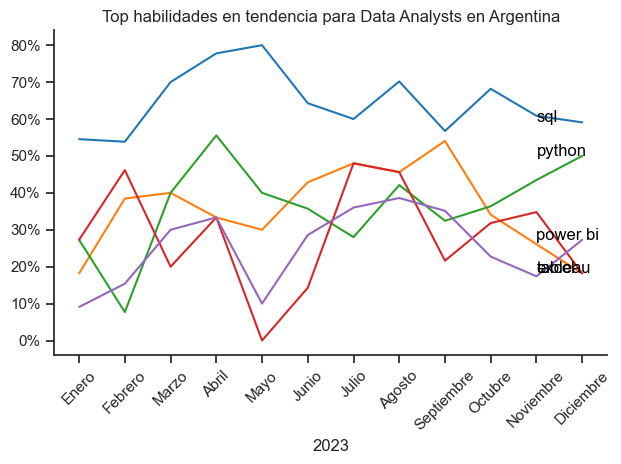

In [ ]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_ARG_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Top habilidades en tendencia para Data Analysts en Argentina')
plt.ylabel('')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xticks(rotation=45, ha='right')  # rota los nombres 45° y los alinea a la derecha
plt.tight_layout()                   # ajusta automáticamente el espaciado

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(10, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()